## Use Python to create a tool that scraps Twitter accounts for data. 

IMPORTANT NOTE: You are not allowed to use Twitter API for this task. You should create a script that parses, scraps and displays information from a Twitter page. 



The scraper will take an input of 10 Twitter accounts and scrape them every X minutes, looking for mentions of stock symbols.

This is what a stock symbol looks like on Twitter: ‘’$TSLA’’ – there will always be a Cashtag “$” before it
Your script inputs should be
List of Twitter Accounts 
Ticker (the $ with a 4 or 3 letter word) to look for
The time interval for another scraping session
The output displayed should be:
The number of times the stock symbol was mentioned
Stock Symbol (e.g. $TSLA, $SOFI, $APPL, etc.)
The time interval used

Output example: “‘’$TSLA’’ was mentioned ‘’10’’ times in the last ‘’15’’ minutes.”

In [1]:
# import libraries 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 
#!pip install selenium
#!pip install msedge-selenium-tools
#!pip install schedule

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from msedge.selenium_tools import Edge , EdgeOptions
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options
from getpass import getpass
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import time
import schedule
from time import sleep
import datetime
import csv
import re

In [2]:
options = EdgeOptions()
options.use_chromium = True
driver = Edge(options =options ,executable_path= "msedgedriver.exe")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Selenium Tools for Microsoft Edge is deprecated. Please upgrade to Selenium 4 which has built-in support for Microsoft Edge (Chromium): https://docs.microsoft.com/en-us/microsoft-edge/webdriver-chromium/#upgrading-from-selenium-3
  This is separate from the ipykernel package so we can avoid doing imports until


## login

In [3]:
# Open Twitter login page
driver.get('https://twitter.com/login')

# Wait for page to load (adjust sleep time as needed)
time.sleep(10)

try:
    # Find username and password input fields and enter your credentials
    username = input("Enter your username: ")

    username_input = driver.find_element_by_xpath('//input[@name="text"]')
    username_input.send_keys(username)
    username_input.send_keys(Keys.ENTER)
    time.sleep(10)

    try:
        # Attempt to find the password input element by XPath
        password = getpass("Enter your password: ")
        password_input = driver.find_element_by_xpath('//input[@name="password"]')
        password_input.send_keys(password)
        password_input.send_keys(Keys.ENTER)
        time.sleep(10)
        
        print("Successful login")

    except NoSuchElementException:

        phoneNumberorusername = input("Enter your phoneNumber or username: ")
        phoneNumberorusername_input = driver.find_element_by_xpath('//input[@name="text"]')
        phoneNumberorusername_input.send_keys(phoneNumberorusername)
        phoneNumberorusername_input.send_keys(Keys.ENTER)
        time.sleep(10)
        password = getpass("Enter your password: ")
        password_input = driver.find_element_by_xpath('//input[@name="password"]')
        password_input.send_keys(password)
        password_input.send_keys(Keys.ENTER)
        time.sleep(10)
        
        print("Successful login")


    except :    
        print("Error in login please run cell and try again")
except :    
        print("Error in login please run cell and try again")
        


Enter your username: ahmedelshityfee53@gmail.com
Enter your password: ········
Enter your phoneNumber or username: 01033156771
Enter your password: ········
Successful login


## Enter a URL

In [4]:
urls = ["https://twitter.com/Mr_Derivatives","https://twitter.com/warrior_0719","https://twitter.com/ChartingProdigy","https://twitter.com/allstarcharts","https://twitter.com/yuriymatso","https://twitter.com/TriggerTrades","https://twitter.com/AdamMancini4","https://twitter.com/CordovaTrades","https://twitter.com/Barchart","https://twitter.com/RoyLMattox"]
while True:
    url = input("Enter a URL (enter 'done' to stop): ")
    if url.lower() == 'done':
        break
    urls.append(url)

Enter a URL (enter 'done' to stop): done


## get data

In [5]:
def get_tweet_data(card):
    try:

        tweetData = card.find_element_by_xpath('//div[@data-testid="User-Name"]')
        name = tweetData.find_element_by_xpath('.//div[1]').text
        atname = tweetData.find_element_by_xpath('.//div[2]/div[1]/div[1]').text
        try:
                time = tweetData.find_element_by_xpath('//time').get_attribute('datetime')         
        except :    
                time ='' 
        pattern = r'\$[A-Za-z]+'
        tweetText = card.find_element_by_xpath('//div[@data-testid="tweetText"]').text  
        stock_symbols = re.findall(pattern, tweetText)
        if not stock_symbols:
               stock_symbols = ['not exist']
        stock_symbols = ','.join(stock_symbols) 
        tweet = (name,atname,time,tweetText,stock_symbols)
        return tweet
    except :
         return ''
         
        
        
userName = []
handle = []
postdate = []
tweetTexts = []
stock_symbols = []
tweet_ids = set()

def scraper (urls):
        for url in urls:
            try:
                driver.get(url)
                sleep(15)
                last_position = driver.execute_script("return window.pageYOffset;")
                scrolling = True
                while scrolling:
                    sleep(5)
                    cards = driver.find_elements_by_xpath('//article[@data-testid="tweet"]')
                    for card in cards: 
                        tweet = get_tweet_data(card)
                        tweet_id = ''.join(tweet)
                        if tweet_id not in tweet_ids:
                                tweet_ids.add(tweet_id)
                                tweet_list = list(tweet)
                                stocks = tweet_list[4].split(',')
                                if stocks:
                                    for stock in stocks:
                                        stock_symbols.append(stock)
                                        userName.append(tweet_list[0])
                                        handle.append(tweet_list[1])
                                        postdate.append(tweet_list[2]) 
                                        tweetTexts.append(tweet_list[3])
                                else : 
                                    stock_symbols.append('not found')
                                    userName.append(tweet_list[0])
                                    handle.append(tweet_list[1])
                                    postdate.append(tweet_list[2]) 
                                    tweetTexts.append(tweet_list[3])
                        sleep(2)
                    sleep(5)
                    scroll_attempt = 0
                    while True: 
                        #check scroll position
                        driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
                        sleep(5)
                        curr_position = driver.execute_script("return window.pageYOffset;")
                        if last_position == curr_position:
                            scroll_attempt +=1

                            if scroll_attempt >= 3:
                                scrolling = False 
                                break

                            else :
                                sleep(5)
                        else:
                            last_position = curr_position
                            break

                print(f"url : {url} Successful scraper ")

            except :
                print(f"url : {url} Error in scraper please run cell and try again")

        print("Successful scraper")
        return 1

    
        

        
        
# scraper

#scraper(urls)


# Time interval 
interval_minutes = 1

# Schedule the job to run every interval_minutes minutes
schedule.every(interval_minutes).minutes.do(scraper, urls)

print(f"Scheduled job to run every {interval_minutes} minutes")

while True:
    schedule.run_pending()
    time.sleep(10)  



url : https://twitter.com/Mr_Derivatives Successful scraper 
url : https://twitter.com/warrior_0719 Successful scraper 
url : https://twitter.com/ChartingProdigy Successful scraper 
url : https://twitter.com/allstarcharts Successful scraper 
url : https://twitter.com/yuriymatso Successful scraper 
url : https://twitter.com/TriggerTrades Successful scraper 
url : https://twitter.com/AdamMancini4 Successful scraper 
url : https://twitter.com/CordovaTrades Successful scraper 
url : https://twitter.com/Barchart Successful scraper 
url : https://twitter.com/RoyLMattox Successful scraper 
Successful scraper


'\n# Time interval \ninterval_minutes = 1\n\n# Schedule the job to run every interval_minutes minutes\nschedule.every(interval_minutes).minutes.do(scraper, urls)\n\nprint(f"Scheduled job to run every {interval_minutes} minutes")\n\nwhile True:\n    schedule.run_pending()\n    time.sleep(10)  \n'

## Create DataFrame

In [10]:
# Create DataFrame
df = pd.DataFrame({
    'User Name': userName,
    'Handle': handle,
    'Post Date': postdate,
    'Tweet Texts': tweetTexts,
    'Stock Symbols': stock_symbols
})



df['datetime'] = pd.to_datetime(df['Post Date'])


df['date'] = df['datetime'].dt.date  
df['time'] = df['datetime'].dt.time  


df.drop(columns=['Post Date', 'datetime'], inplace=True)

df = df[df['Stock Symbols'] != 'not exist']
# Print DataFrame
df.head()

,User Name,Handle,Tweet Texts,Stock Symbols,date,time
0,Heisenberg,@Mr_Derivatives,$SMCI options were pricing in a 14%-15% move e...,$SMCI,2024-04-30,20:30:56
4,Heisenberg,@Mr_Derivatives,Heisenberg Play of the Month:\n\n$DKNG\n\nWe h...,$DKNG,2024-04-23,16:12:04
6,Heisenberg,@Mr_Derivatives,$GOOG and $MSFT holders after seeing $NFLX and...,$GOOG,2024-04-24,22:20:37
7,Heisenberg,@Mr_Derivatives,$GOOG and $MSFT holders after seeing $NFLX and...,$MSFT,2024-04-24,22:20:37
8,Heisenberg,@Mr_Derivatives,$GOOG and $MSFT holders after seeing $NFLX and...,$NFLX,2024-04-24,22:20:37


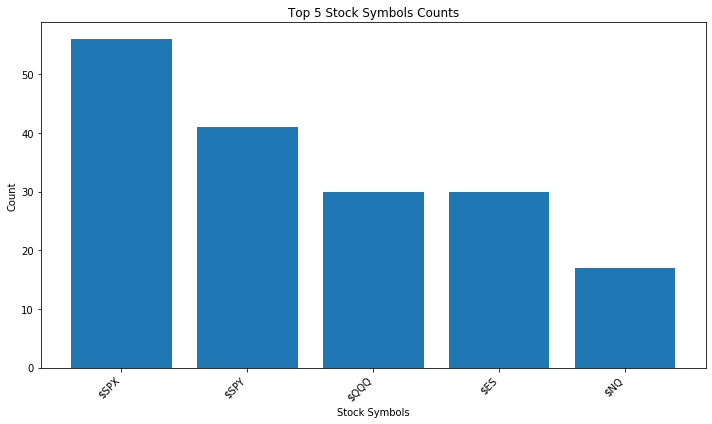

In [19]:
symbol_counts = df['Stock Symbols'].value_counts()

# Create a new DataFrame from the value counts
symbol_counts_df = pd.DataFrame(symbol_counts).reset_index()
symbol_counts_df.columns = ['Stock Symbols', 'Count']
symbol_counts_df = symbol_counts_df.sort_values(by='Count', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(symbol_counts_df['Stock Symbols'][:5], symbol_counts_df['Count'][:5])
plt.xlabel('Stock Symbols')
plt.ylabel('Count')
plt.title('Top 5 Stock Symbols Counts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


In [20]:
symbol_counts_df

,Stock Symbols,Count
0,$SPX,56
1,$SPY,41
2,$QQQ,30
3,$ES,30
4,$NQ,17
...,...,...
65,$T,1
66,$btc,1
67,$vix,1
68,$TLRY,1


In [21]:
grouped_df = df.groupby(['User Name' ,'Stock Symbols']).agg({'Stock Symbols': 'count'})
grouped_df.columns = ['Count']  # Rename the aggregated column

# Reset index to make the grouped columns regular columns
grouped_df.reset_index(inplace=True)
grouped_df = grouped_df.sort_values(by='Count', ascending=False)

In [22]:
grouped_df

,User Name,Stock Symbols,Count
63,King of the Charts,$SPX,27
61,King of the Charts,$QQQ,25
67,King of the Charts,$SPY,25
142,𝕋ℝ𝕀𝔾𝔾𝔼ℝ 𝕋ℝ𝔸𝔻𝔼𝕊,$SPX,22
143,𝕋ℝ𝕀𝔾𝔾𝔼ℝ 𝕋ℝ𝔸𝔻𝔼𝕊,$SPY,13
...,...,...,...
47,Julia Cordova,$TSLA,1
46,Julia Cordova,$TLRY,1
45,Julia Cordova,$SPY,1
44,Julia Cordova,$RTY,1


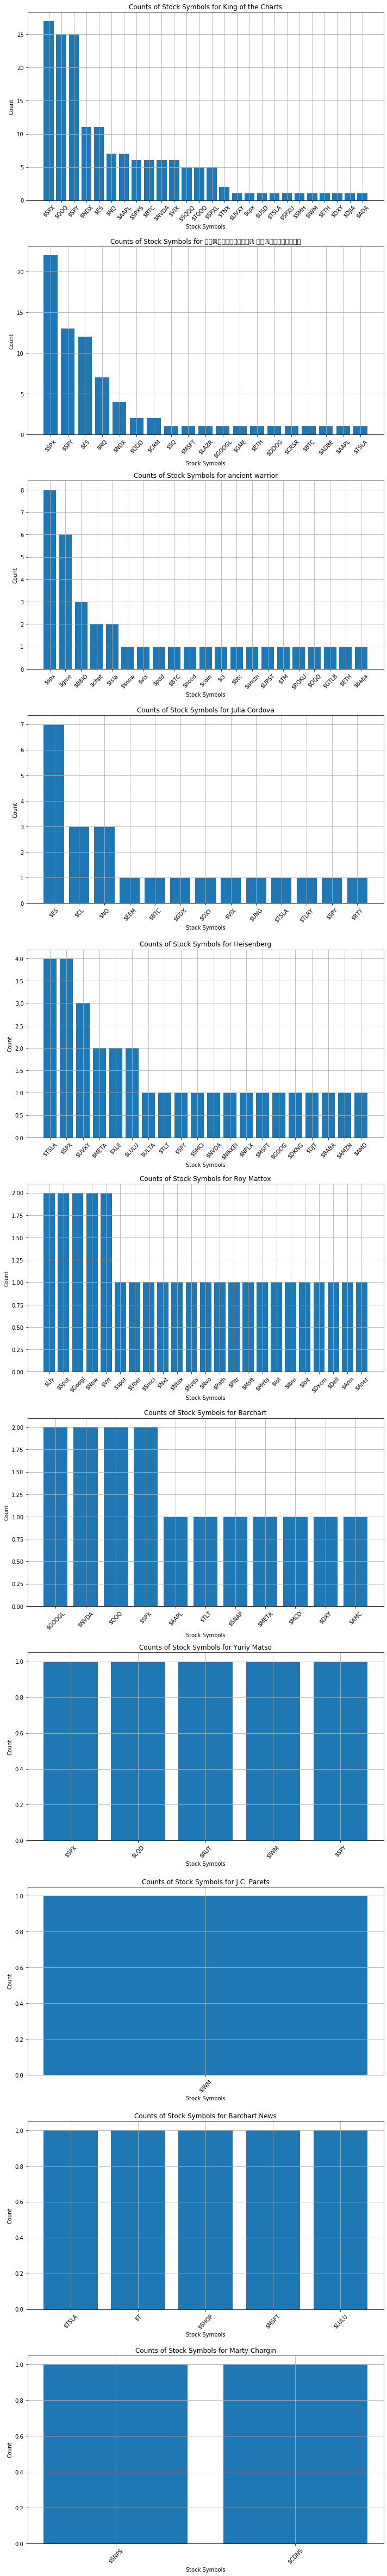

In [23]:
# Get unique names for subplots
unique_names = grouped_df['User Name'].unique()

# Plotting each group separately
fig, axs = plt.subplots(len(unique_names), figsize=(10, 6 * len(unique_names)))

for i, name in enumerate(unique_names):
    group_data = grouped_df[grouped_df['User Name'] == name]
    ax = axs[i] if len(unique_names) > 1 else axs  # Use a single axis if there is only one name
    
    ax.bar(group_data['Stock Symbols'], group_data['Count'])
    ax.set_xlabel('Stock Symbols')
    ax.set_ylabel('Count')
    ax.set_title(f'Counts of Stock Symbols for {name}')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

plt.tight_layout()
plt.show()